In [93]:
######################################
###          DATA STORY            ###
######################################

In [94]:
### Imports ###
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
from pyechonest import config
from pyechonest import song
from pyechonest import artist

In [95]:
### Functions creation ###

In [103]:
# Creation of a list of integers corresponding to all the years we are interested in
def create_years_list(start_year, end_year):
    years = []
    for i in range(start_year + 1, end_year + 1):
        years.append(i)
    return years

In [104]:
# Creation of a global dataframe from the CSV files
# This df has a new column named "year" to be able to do the filtering
def create_billboard_df_from_CSV(start_year, years):
    billboard_df = pd.read_csv('CSV_data/Billboard_Year-End_Hot_100_singles_of_' + str(start_year) + '.csv')
    billboard_df['Year'] = pd.Series(start_year, index = billboard_df.index)

    df_list = []
    for year in years:
        # Open CSV file
        billboard_current_year = pd.read_csv('CSV_data/Billboard_Year-End_Hot_100_singles_of_' + str(year) + '.csv')
        billboard_current_year['Year'] = pd.Series(year, index = billboard_current_year.index)
        df_list.append(billboard_current_year)

    # Creation of a big data frame containing all the data
    return billboard_df.append(df_list, ignore_index = True)  

In [105]:
def create_tableau20_RGB_code():
    # These are the "Tableau 20" colors as RGB + pale gray
    tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
                 (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
                 (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
                 (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
                 (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229), (248,248,248)]    

    # Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
    for i in range(len(tableau20)):    
        r, g, b = tableau20[i]    
        tableau20[i] = (r / 255., g / 255., b / 255.) 
    
    return tableau20

In [106]:
# graph_type is a string which can be {'Artist(s)', 'Title'}
def create_stats_lists(graph_type, years, billboard_df):
    if graph_type not in ['Artist(s)', 'Title']:
        raise NameError('Incorrect value of parameter graph_type')
        
    # Put the different values in lists as it is easier to plot
    min_values = []
    max_values = []
    mean_values = []
    number1_values = []
    for year in years:
        min_values.append(billboard_df[billboard_df["Year"] == year][graph_type].str.len().min())
        max_values.append(billboard_df[billboard_df["Year"] == year][graph_type].str.len().max())
        mean_values.append(billboard_df[billboard_df["Year"] == year][graph_type].str.len().mean())
        number1_values.append(billboard_df[(billboard_df["Year"] == year) & (billboard_df["Num"] == 1)][graph_type].str.len().item())
    
    return (min_values, max_values, mean_values, number1_values)

In [117]:
def create_name_length_plot(graph_type, billboard_df, years, start_year, end_year,
                     ylabel, plot_title, save_title_path, legend_loc):
    
    tableau20 = create_tableau20_RGB_code()
    min_values, max_values, mean_values, number1_values = create_stats_lists(graph_type, years, billboard_df)
    
    # Plot size
    plt.figure(figsize=(12, 9)) 

    # Remove the plot frame lines 
    ax = plt.subplot(111)  
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False) 

    # Ensure that the axis ticks only show up on the bottom and left of the plot.   
    ax.get_xaxis().tick_bottom()  
    ax.get_yaxis().tick_left()  

    # Limit the range of the plot to only where the data is. 
    plt.ylim(0, max(max_values) + 5) 
    plt.xlim(start_year - 2, end_year + 2)

    # Make sure axis ticks are large enough to be easily read.    
    plt.xticks(range(start_year, end_year, 10), fontsize=14)  
    plt.yticks(range(0, max(max_values) + 5, 10), fontsize=14)  

    # Make sure axis labels are large enough to be easily read as well. 
    plt.ylabel(ylabel, fontsize=16)

    # Use matplotlib's fill_between() call to fill the area between the different lines
    plt.fill_between(years, min_values, max_values, color = tableau20[len(tableau20) - 1]) 

    # Plot the mean, min, max and number 1 values  
    plt.plot(years, mean_values, marker = 'o', linestyle = '--', color = tableau20[0], label = "mean") 
    plt.plot(years, min_values, marker = 'v', linestyle = '--', color = tableau20[2], label = "min") 
    plt.plot(years, max_values, marker = '^', linestyle = '--', color = tableau20[4], label = "max") 
    plt.plot(years, number1_values, '*', color = tableau20[6], label = "number1") 

    # Plot title 
    plt.title(plot_title, fontsize=22)

    # Legend
    plt.legend(loc=legend_loc) 

    # Save the figure as a PNG.    
    plt.savefig(save_title_path, bbox_inches="tight")

In [ ]:
### Main Code ###

In [107]:
# Set ECHO_NEST_API_KEY value
config.ECHO_NEST_API_KEY = "V2KYAQQLNXM5FEUUU"

In [108]:
# Define the starting and ending years 
start_year = 1960
end_year = 2014

In [109]:
# Create a list containing all the years we are interested in
years = create_years_list(start_year, end_year)

In [110]:
# Creation of the global dataframe
billboard_df = create_billboard_df_from_CSV(start_year, years)

In [112]:
#billboard_df.head()

In [116]:
#billboard_df.tail()

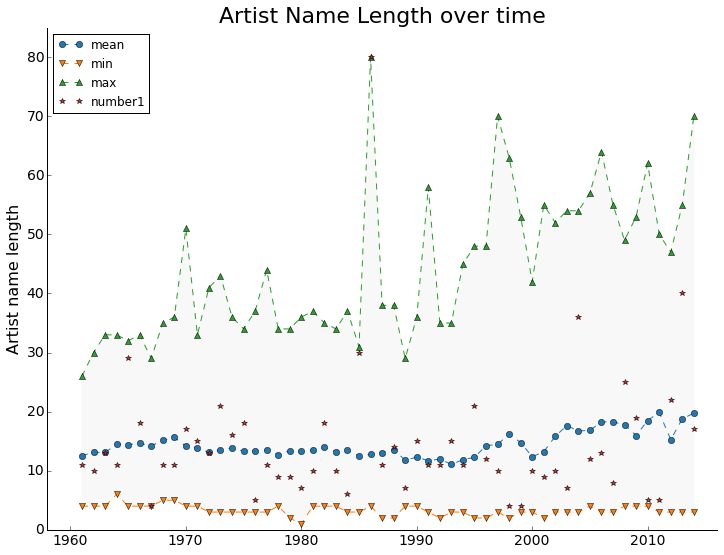

In [118]:
# Plot the Artist Name Length vs the year
create_name_length_plot('Artist(s)', billboard_df, years, start_year, end_year,
                     "Artist name length", "Artist Name Length over time",
                 "Images/Artist-name-length-over-time.png", 2) 

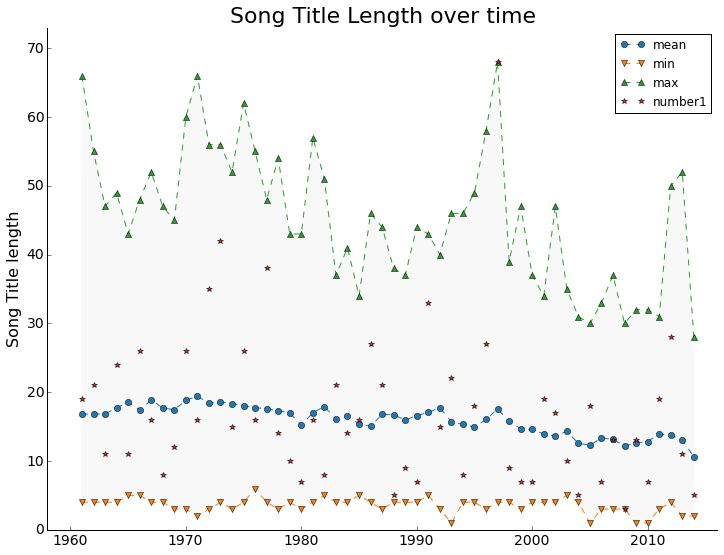

In [119]:
# Plot the Song Title Length vs the year
create_name_length_plot('Title', billboard_df, years, start_year, end_year,
                     "Song Title length", "Song Title Length over time",
                 "Images/Song-title-length-over-time.png", 1) 

In [ ]:
# Number of featuring over time (histogram)

In [ ]:
# Artists who appear more than once in the rankings (for each song listed
# show the rank + year + name of the artist)

In [ ]:
# Start to use the Echo Nest API to analyze some more interesting features

In [ ]:
# artist_location -> display data on a map